## Three varieties of Iris, classification
### Create an output model for iris varieties

**learning purpose**

* scikit-learn에 내장된 예제 데이터셋의 종류 파악 및 활용
* scikit-learn에 내장된 분류 모델 학습 및 예측
* 모델의 성능을 평가
* Descision Tree, XGBoost, RandomForest, 로지스틱 회귀모델을 활용해서 간단한 학습 및 예측
* 데이터셋 사용한 분류 기초 실습 진행

In [4]:
# scikit-learn의 예제 데이터셋은 sklearn 라이브러리의 datasets 패키지 안에 존재
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris)) # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [5]:
# keys() 메서드로 iris 내 정보 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# key데이터 iris_data 변수에 저장 후, 데이터 크기 확인
iris_data = iris.data

print(iris_data.shape)
# shape는 배열의 형상정보를 출력

(150, 4)


: 총 150개의 데이터가 각각  4개의 정보를 담고 있음.

In [8]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

: sepal length, sepal width, petal length, petal width 순으로 나옴.

In [9]:
# 모델이 출력해야 하는 라벨 또는 타겟 확인
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# 라벨 이름 확인
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

: 0이라면 setosa, 1이라면 versicolor, 2라면 virginica

In [11]:
# 남은 변수 확인
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.filename

'iris.csv'

In [15]:
# pandas를 활용해 DataFrame 자료형으로 변환
import pandas as pd

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# 정답 데이터 칼럼 추가
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* Supervised Learning
    * Problem paper: Data input into machine learning models. It's called feature. X is often used as a variable name.
    * Answer sheet: Data that machine learning models should fit. It's called label or target. Y is often used as a variable name.

**Separate into training and test datasets**

In [18]:
# sklearn.mode_selection 패키지의 train_test_split 활용
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                   iris_label,
                                                   test_size=0.2,
                                                   random_state=7)
print('X_train 개수: ', len(X_train),',X_test 개수: ', len(X_test))

X_train 개수:  120 ,X_test 개수:  30


In [19]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [20]:
X_test.shape, y_test.shape

((30, 4), (30,))

: 총 150개의 데이터중 20%는 test dataset, 나머지 80%는 train dataset

In [22]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

#### ★theorem

* First, there is a correct answer during machine learning and it is supervised learning to learning to learn to correct the correct answer.
* The Classification Problem of Supervised Learning, which category of data is given among specific categories.

**1. Decision Tree**<br/>
[의사결정나무](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)

: Decision Tree is a model that finds a boundary to separate data to make decisions and sorts the data one step by step as if it were sifting.<br/>
In this process, information theory concepts such as entropy, information quantity, and genie impurities are included.

In [23]:
# Decision Tree는 sklearn.tree 패키지 안에 DecisionTreeClassifier라는 이름으로 내장되어 있음.
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 32) # 변수에 모델 저장
print(decision_tree._estimator_type)

classifier


In [24]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

: What I'm going to look at here is that the name of the method you learn is fit.
Learning a model with training dataset is, in other words, fitting the model to the training dataset.<br/>
This is because the data in the training dataset are taught to identify a pattern and to predict it according to the pattern.<br/>
In other words, the model does not know what the correct answer category is for data that does not exist in the training dataset.<br/>
It is just a pattern learned through training dataset that predicts what category new data will belong to.<br/>
So it is very important to know how the training dataset is configured to fit well with new data.<br/>
The more diverse, more generalized data is learned, the better you can match new data.<br/>

In [25]:
# test 데이터로 모델 예측
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

: X_test data has no correct answer label, and feature data. Therefore if I run predict with X_test data on the completed decision_tree model, I will get the model's predicted y_pred.

In [26]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

**model performance evaluation**

In [27]:
# Accuracy evaluation
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

$$정확도=\frac{예측결과가 정답인 데이터의 개수}{예측한 전체 데이터의 개수}$$

: 30 * 0.9 = 27개 예측 성공

**1.1. Decision Tree 모델 코드**

In [28]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



**2. Random Froest**

: Decision Tree를 여러 개 모아놓은게 Random Forest이다. 이러한 기법을 흔히 앙상블(Ensemble) 기법이라 하며, 단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단지성으로 극복한 개념이다.

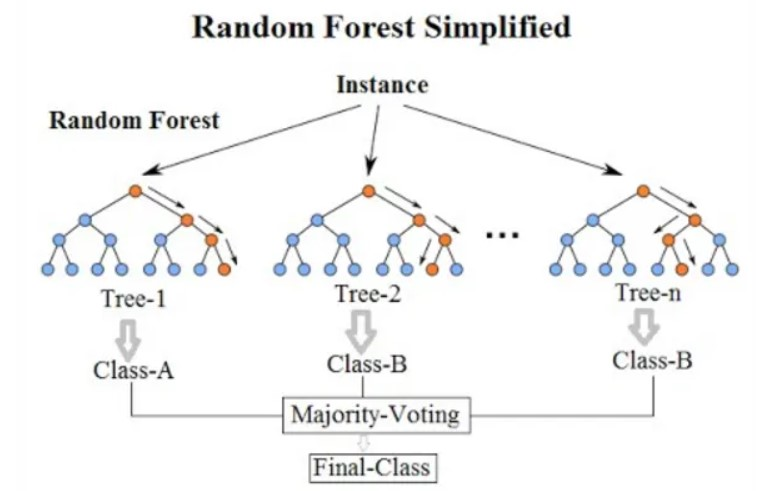

<https://hugrypiggykim.com/2019/04/07/bagging-boosting-and-stacking/>

: Random Forest는 여러 개의 의사 결정 트리를 모아 놓은것으로, 각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다.

In [29]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



**3. Support Vector Machine (SVM)**

: SVM is a typical linear classification algorithm that performs classification using Support Vector and Hyperplane.

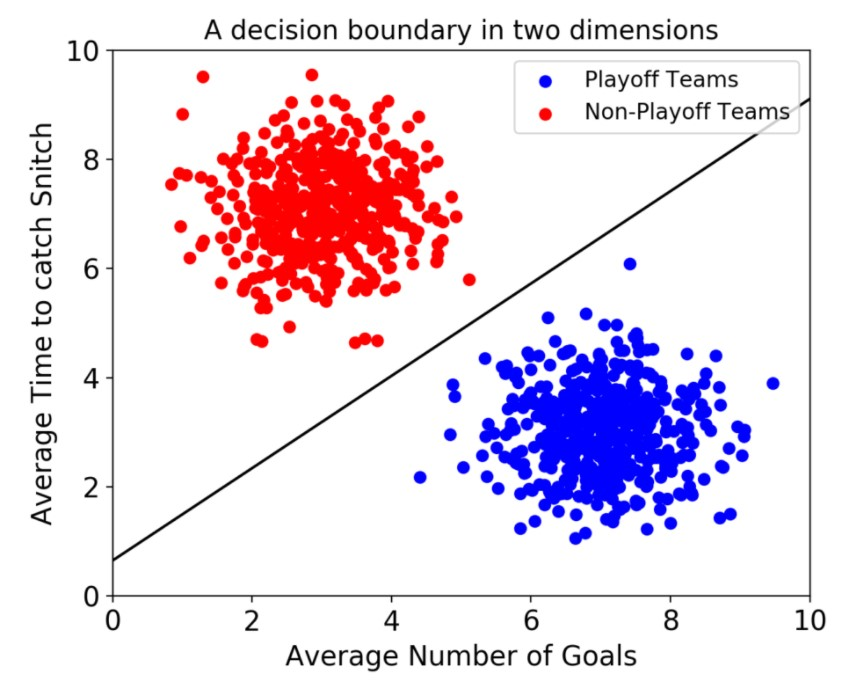

<https://hleecaster.com/ml-svm-concept/>

* In 2-dimensional space, that is, when only two classes exist in data
    * Decision Boundary: A line that separates two classes
    * Support Vector: Data close to Decision Boundary
    * Margin: Distance between Decision Boundary and Support Vector

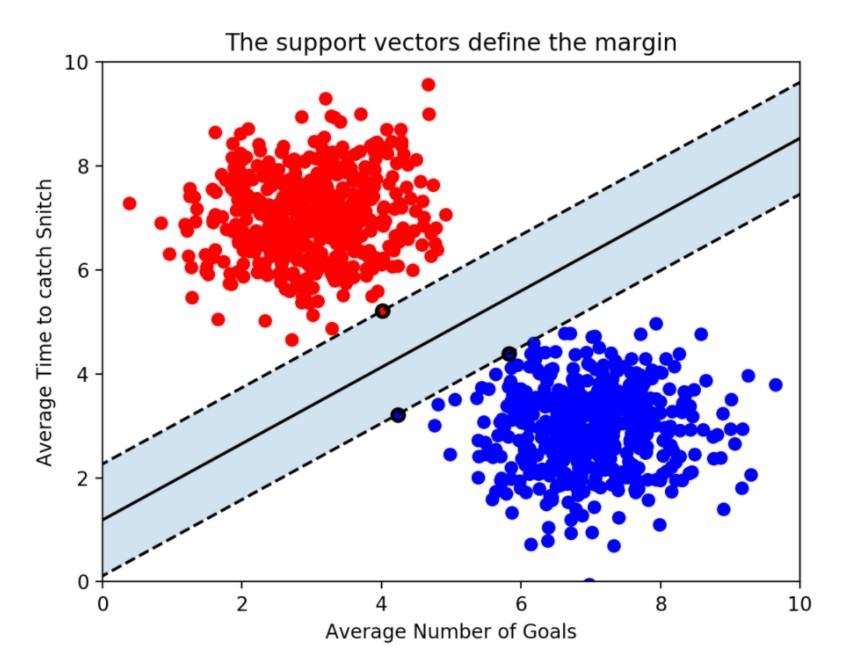

<https://hleecaster.com/ml-svm-concept/>

: The wider the Margin, the better the new data can be distinguished(Margin maximization -> Roubustness maximization)>

* Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.
* cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.
* γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary를 직선에 가까워진다.

In [34]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



In [33]:
print(svm_model._estimator_type)

classifier


**4. Stochastic Gradient Descent Classifier (SGDClassifier)**

: Gradient descent Algorithm with 1 Layout Size<br/>
<br/>
Probabilistic Gradient descent calculates the prediction gradient of each step by relying on one example selected randomly and uniformly in the data set.

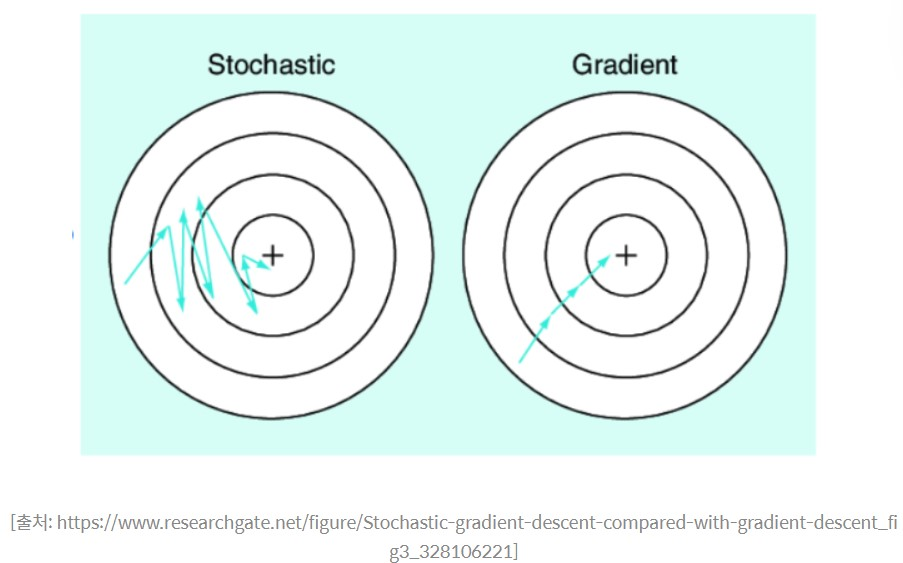

: Gradient Descent에서 배치는 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수이다. Gradient Descent 에서의 배치는 전체 데이서 셋이라고 가정.

하지만 데이터 셋의 개수가 많을 때는 배치가 거대해질 수 있다. 배치가 너무 커지면 단일 반복으로도 계산하는 데 시간이 오래 걸릴 수 있으며, 무작위로 샘플링된 예가 포함된 대량의 데이터 셋에는 중복 데이터가 포함되어 있을 확률이 높아진다.

SGD는 데이터 세트에서 예(data)를 무작위로 선택해 훨씬 적은 데이터 세트로 중요한 평균값을 추정하며 반복당 하나의 예(배치 크기1)만을 사용한다.

: 하지만 반복이 충분하면 SGD가 효과가는 있지만 노이즈가 매우 심하다. 여러 변형 함수의 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않는다.(최저점을 찾지 못할 수 있음)<br/>
미니 배치 SGD는 전체 배치 반복과 SGD의 절충안이다.

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



**5. Logistic Regression**

: Most widely known Linear Classification Algorithm.<br/>
It is a multiclass classification algorithm using a softmas function, and the Logistic Regression for multiclass classification is also called the Softmax Regression. The name is regression, but in reality, it does classification.

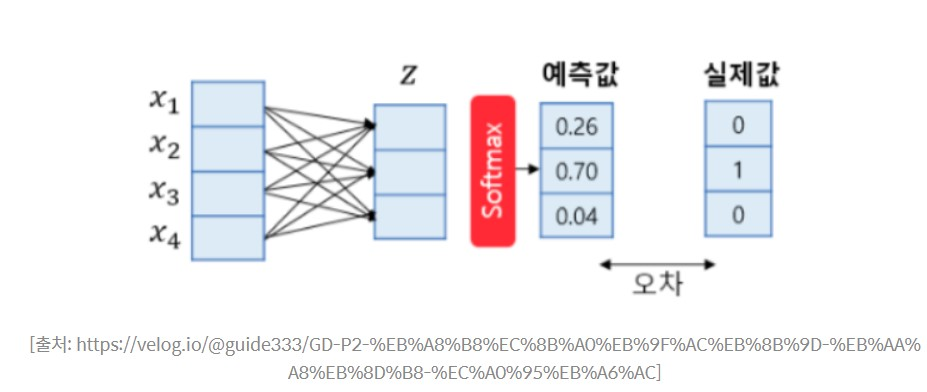

* Softmax Function: 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수. 위의 그림은 4차원의 벡터를 입력으로 받아 3개의 클래스를 예측하는 경우의 소프트맥스 회귀의 동작 과정을 보여준다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습된다.

In [37]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

